# Sales Analysis

In [2]:
#Import necessary libraries
import pandas as pd
import os

#### Merging 12 months of data into one dataset.

In [3]:
metadata = pd.read_csv('..\..\data\Sales_Data\Sales_January_2019.csv')
path = '..\..\data\Sales_Data'
files = [path+ "\\" + file for file in os.listdir(path)]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(path + "\\" + file)
    all_months_data = pd.concat([all_months_data, df])
# metadata = pd.concat([pd.read_csv(file) for file in files])
all_months_data.dropna(how = 'all',inplace= True)
# metadata.head(10)\
all_months_data.to_csv("all_data.csv", index = False)

#### Read the updated csv file

In [40]:
df = pd.read_csv(path+"\\all_data.csv")
df.dropna(inplace=True)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


#### What was the best month for sales? How much was earned?

In [5]:
#our data frame
monthly_data = pd.DataFrame({'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        'Quantity Sold':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Earning':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]})
monthly_data.head(12)

,Month,Quantity Sold,Earning
0,Jan,0,0
1,Feb,0,0
2,Mar,0,0
3,Apr,0,0
4,May,0,0
5,Jun,0,0
6,Jul,0,0
7,Aug,0,0
8,Sep,0,0
9,Oct,0,0


In [6]:
for index, row in df.iterrows():
    data = row
    if (data[4] == "Order Date"):
        continue
    # print(data[4])
    mon = int(data[4].split("/")[0])
    quantity = int(data[2])
    price = quantity * float(data[3])
    # monthly_data.loc[mon-1, 1] = (monthly_data.iloc[mon-1,1] + quantity).astype(str)
    monthly_data.iloc[mon-1,1] += quantity
    monthly_data.iloc[mon-1,2] += price
monthly_data

,Month,Quantity Sold,Earning
0,Jan,10903,1.822257e+06
1,Feb,13449,2.202022e+06
2,Mar,17005,2.807100e+06
3,Apr,20558,3.390670e+06
4,May,18667,3.152607e+06
5,Jun,15253,2.577802e+06
6,Jul,16072,2.647776e+06
7,Aug,13448,2.244468e+06
8,Sep,13109,2.097560e+06
9,Oct,22703,3.736727e+06


In [7]:
monthly_data.sort_values(['Earning'],ascending=False)
# April

,Month,Quantity Sold,Earning
11,Dec,28114,4.613443e+06
9,Oct,22703,3.736727e+06
3,Apr,20558,3.390670e+06
10,Nov,19798,3.199603e+06
4,May,18667,3.152607e+06
2,Mar,17005,2.807100e+06
6,Jul,16072,2.647776e+06
5,Jun,15253,2.577802e+06
7,Aug,13448,2.244468e+06
1,Feb,13449,2.202022e+06


range(1, 13)


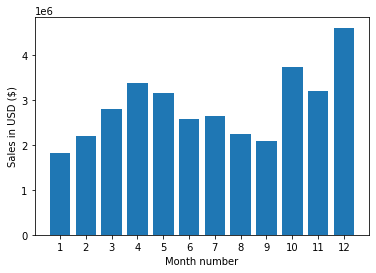

In [8]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,monthly_data['Earning'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [63]:
# What US city had the highest # of sales.
def get_state(addi):
   return addi.split(",")[2].strip(" ")[0:2]

def get_city(addi):
    return addi.split(",")[1].strip("")
df = df[df['Order Date'].str[0:2] != 'Or']
df['City'] = df['Purchase Address'].apply(lambda x:  f'{get_city(x)} ({get_state(x)})')
df.groupby(['City']).sum()
new_df = df.groupby(['City']).sum()
new_df

,Count
City,
Atlanta (GA),14881
Austin (TX),9905
Boston (MA),19934
Dallas (TX),14820
Los Angeles (CA),29605
New York City (NY),24876
Portland (ME),2455
Portland (OR),10010
San Francisco (CA),44732


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
